In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.layers import LSTM, Dropout, Dense
from keras.utils import to_categorical

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
events_dict = {
    'BLUE: first_blood': 0,
    'BLUE: dragon': 1,
    'BLUE: herald': 2,
    'BLUE: first_tower_top': 3,
    'BLUE: first_tower_mid': 4,
    'BLUE: first_tower_bot': 5,
    'BLUE: second_tower_top': 6,
    'BLUE: second_tower_mid': 7,
    'BLUE: second_tower_bot': 8,
    'BLUE: third_tower_top': 9,
    'BLUE: third_tower_mid': 10,
    'BLUE: third_tower_bot': 11,
    'BLUE: inhibitor_top': 12,
    'BLUE: inhibitor_mid': 13,
    'BLUE: inhibitor_bot': 14,
    'BLUE: baron': 15,
    'BLUE: elder_dragon': 16,
    'BLUE: nexus_tower': 17,
    'BLUE: nexus': 18,
    'RED: first_blood': 19,
    'RED: dragon': 20,
    'RED: herald': 21,
    'RED: first_tower_top': 22,
    'RED: first_tower_mid': 23,
    'RED: first_tower_bot': 24,
    'RED: second_tower_top': 25,
    'RED: second_tower_mid': 26,
    'RED: second_tower_bot': 27,
    'RED: third_tower_top': 28,
    'RED: third_tower_mid': 29,
    'RED: third_tower_bot': 30,
    'RED: inhibitor_top': 31,
    'RED: inhibitor_mid': 32,
    'RED: inhibitor_bot': 33,
    'RED: baron': 34,
    'RED: elder_dragon': 35,
    'RED: nexus_tower': 36,
    'RED: nexus': 37
}

n_in = 6
df = pd.read_csv('data/clean-one-line.csv')
df = df.drop('golId', axis=1)
data = df.values.tolist()

for game in data:
    for i, s in enumerate(game):
        if s in events_dict:
            game[i] = events_dict.get(s)

sequence = [b for b in data if not(isinstance(b, float))]
sequence = [[x for x in y if not np.isnan(x)] for y in sequence]

In [3]:
def splitSequence(games, n_steps_in, n_steps_out=1):
    X, Y = [], []
    
    for sequence in games:
        for i in range(len(sequence)):
            # find the end of this pattern
            end_ix = i + n_steps_in
            out_end_ix = end_ix + n_steps_out
            # check if we are beyond the sequence
            if out_end_ix > len(sequence):
                break
            # gather input and output parts of the pattern
            seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
            X.append(seq_x)
            Y.append(seq_y)
	
    return X, Y

def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc

In [4]:
train, y_train = splitSequence(sequence, n_in)
len(train)

59218

In [5]:
train[0]

[19, 1, 2, 1, 3, 24]

In [6]:
df_train = pd.DataFrame({'event_1': [],
                   'event_2': [],
                   'event_3': [],
                   'event_4': [],
                   'event_5': [],
                   'event_6': [],
                   'target': []})

In [7]:
for index, train_row in enumerate(train):
    event_1 = train_row[0]
    event_2 = train_row[1]
    event_3 = train_row[2]
    event_4 = train_row[3]
    event_5 = train_row[4]
    event_6 = train_row[5]
    df_train.loc[len(df_train.index)] = [event_1, event_2, event_3, event_4, event_5, event_6, y_train[index][0]]

In [8]:
df_train.head()

,event_1,event_2,event_3,event_4,event_5,event_6,target
0,19.0,1.0,2.0,1.0,3.0,24.0,2.0
1,1.0,2.0,1.0,3.0,24.0,2.0,23.0
2,2.0,1.0,3.0,24.0,2.0,23.0,6.0
3,1.0,3.0,24.0,2.0,23.0,6.0,1.0
4,3.0,24.0,2.0,23.0,6.0,1.0,5.0


In [9]:
y_train = df_train['target'].copy()
X_train = df_train.drop(['target'], axis=1)

In [10]:
model = keras.Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (6, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 1))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs = 35, batch_size = 32, validation_split=.15)

Epoch 1/35
1573/1573 [==============================] - 18s 9ms/step - loss: 88.2224 - accuracy: 0.0732 - val_loss: 74.7807 - val_accuracy: 0.0778
Epoch 2/35
1573/1573 [==============================] - 14s 9ms/step - loss: 76.5345 - accuracy: 0.0733 - val_loss: 73.7172 - val_accuracy: 0.0778
Epoch 3/35
1573/1573 [==============================] - 14s 9ms/step - loss: 75.7809 - accuracy: 0.0733 - val_loss: 74.4810 - val_accuracy: 0.0778
Epoch 4/35
1573/1573 [==============================] - 17s 11ms/step - loss: 75.3285 - accuracy: 0.0733 - val_loss: 72.6326 - val_accuracy: 0.0778
Epoch 5/35
1573/1573 [==============================] - 16s 10ms/step - loss: 75.1639 - accuracy: 0.0733 - val_loss: 71.9895 - val_accuracy: 0.0778
Epoch 6/35
1573/1573 [==============================] - 15s 10ms/step - loss: 74.6700 - accuracy: 0.0733 - val_loss: 71.9861 - val_accuracy: 0.0778
Epoch 7/35
1573/1573 [==============================] - 15s 9ms/step - loss: 74.3485 - accuracy: 0.0733 - val_loss:

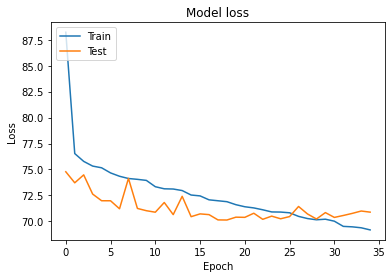

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()